In [ ]:
#Descargamos el archivo desde el drive
!gdown https://drive.google.com/u/0/uc?id=1eH_E6daTeATx5qM0BTenK_3KocRvAXcw&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1eH_E6daTeATx5qM0BTenK_3KocRvAXcw
To: /content/animes.csv
100% 12.1M/12.1M [00:00<00:00, 20.1MB/s]


##Importaciones y descargas

In [ ]:
import pandas as pd
import nltk
import pickle
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('names')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

##Dataset

In [ ]:
dataset = pd.read_csv("/content/animes.csv")
dataset

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [ ]:
dataset = dataset.drop(['img_url', "link"], axis=1)

<Axes: >

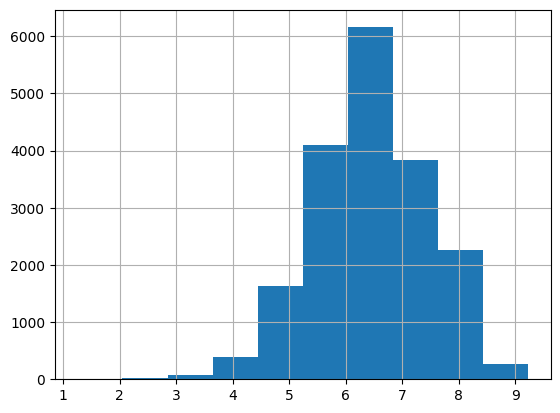

In [ ]:
dataset["score"].hist()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


In [ ]:
dataset["Rank"] = dataset["score"].rank(method="first")

In [ ]:
import pandas as pd

dataset["Quartile"] = pd.qcut(dataset["Rank"], q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
dataset['Quartile'].value_counts()

1    3747
5    3747
2    3746
3    3746
4    3746
Name: Quartile, dtype: int64

##Limpieza

In [ ]:
stoplist = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
#Se crea una funcion para empezar el proceso de limpiado y lematizacion
from nltk.stem.snowball import stopwords
def get_tokens(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stoplist: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    #token = stemmer.stem(token)
    cleaned_tokens.append(token)

  #cleaned_tokens = [i for i in pos_tag(cleaned_tokens) if i [1][:2] in ["RB", "VB", "JJ", "NN"]]

  return cleaned_tokens

In [ ]:
print(dataset['synopsis'].apply(type).value_counts())

<class 'str'>      18336
<class 'float'>      975
Name: synopsis, dtype: int64


In [ ]:
dataset = dataset.dropna(subset=['synopsis'])

In [ ]:
full_vocabulary = []
vocabulary = {category:[] for category in dataset["Quartile"].unique()}
for _, row in dataset.iterrows():
  tokens = get_tokens(row['synopsis'])
  full_vocabulary += tokens
  vocabulary[row["Quartile"]] += tokens

In [ ]:
FreqDist(full_vocabulary).most_common(20)

[('the', 8032),
 ('source', 7153),
 ('a', 4680),
 ('one', 4447),
 ('girl', 3950),
 ('world', 3798),
 ('life', 3675),
 ('school', 3629),
 ('new', 3153),
 ('friend', 2849),
 ('day', 2669),
 ('mal', 2656),
 ('story', 2632),
 ('ann', 2528),
 ('written', 2503),
 ('find', 2463),
 ('however', 2462),
 ('year', 2447),
 ('rewrite', 2415),
 ('in', 2341)]

In [ ]:
FreqDist(vocabulary[2]).most_common(20)

[('the', 1687),
 ('source', 1601),
 ('a', 894),
 ('one', 752),
 ('girl', 713),
 ('story', 577),
 ('world', 562),
 ('ann', 516),
 ('life', 513),
 ('day', 447),
 ('school', 446),
 ('anime', 434),
 ('series', 424),
 ('friend', 417),
 ('anidb', 405),
 ('episode', 403),
 ('video', 394),
 ('new', 393),
 ('in', 366),
 ('young', 363)]

##Instancias Pickle

In [ ]:
most_common_tokens = set()

for quartile in dataset["Quartile"].unique():
  most_common_quartile_tokens = [i[0] for i in FreqDist(vocabulary[quartile]).most_common(500)]
  most_common_tokens = most_common_tokens.union(set(most_common_quartile_tokens))
  with open(f"most_common.tokens", "wb") as file:
    pickle.dump(most_common_tokens, file)

In [ ]:
print(len(list(most_common_tokens)))

863


##Entrenamiento del modelo

In [ ]:
#Funcion de entrenamiento donde ya se trabaja con los tokens limpios
def get_tokens_training(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stoplist: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    if token not in most_common_tokens: continue
    cleaned_tokens.append(token)

#Aca lo que me retorna es cada token en un input separado por espacios
  return " ".join(cleaned_tokens)

In [ ]:
#Creacion de columna nueva con la funcion lambda donde cada token en un input se divide por espacios
dataset['Tokens String'] = dataset['synopsis'].apply(lambda x: get_tokens_training(x))
dataset

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,Rank,Quartile,Tokens String
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,18680.0,5,following high school team attempt effort tour...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,18682.0,5,music path human but mother fall unable sound ...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,18683.0,5,the earth mysterious creature time long past c...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,18731.0,5,in order something something must lost young b...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,18684.0,5,after legendary vampire araragi become vampire...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,16544.0,5,middle living and yet decide goal soon met str...
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,16545.0,5,while student world mysterious book set ancien...
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,16546.0,5,year ago ghost certain student now want reveng...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,16547.0,5,company finally and start go way going find yo...


In [ ]:
#Vectorizando la data
vectorizer = TfidfVectorizer(vocabulary = most_common_tokens)
X = vectorizer.fit_transform(dataset['Tokens String'])
X

<18336x863 sparse matrix of type '<class 'numpy.float64'>'
	with 346457 stored elements in Compressed Sparse Row format>

In [ ]:
with open("vectorizer.pkl", "wb") as file:
  pickle.dump(vectorizer, file)

In [ ]:
y = dataset["score"]

##Modelos de entrenamiento

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Buscando el accuracy de los 10 modelos seleccionados para saber cual de estos es mas eficiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Manejar NaN en y_train
nan_rows_train = y_train.isnull()
X_train = X_train[~nan_rows_train]
y_train = y_train.dropna()

# Manejar NaN en y_test
nan_rows_test = y_test.isnull()
X_test = X_test[~nan_rows_test]
y_test = y_test.dropna()

# Imputar valores en lugar de NaN si es necesario
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train = pd.Series(y_train_imputed.flatten(), index=y_train.index)

y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))
y_test = pd.Series(y_test_imputed.flatten(), index=y_test.index)

#modelos
models = [AdaBoostRegressor(), KNeighborsRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR(), SGDRegressor()]

for model in models:
    model.fit(X_train.toarray(), y_train)
    y_pred = model.predict(X_test.toarray())
    ms_error = mean_squared_error(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Mean Squared Error: {ms_error}")

Model: AdaBoostRegressor, Mean Squared Error: 0.7712021167994252
Model: KNeighborsRegressor, Mean Squared Error: 0.7865424363332404
Model: RandomForestRegressor, Mean Squared Error: 0.50136086770179
Model: DecisionTreeRegressor, Mean Squared Error: 0.8039597722523439
Model: LinearRegression, Mean Squared Error: 0.6390412193433777
Model: SVR, Mean Squared Error: 0.5063355383516821
Model: SGDRegressor, Mean Squared Error: 0.6675902266339439


In [ ]:
#Creacion del mean absolute error perteneciente a cada modelo
for model in models:
  ma_error = mean_absolute_error(y_test, model.predict(X_test.toarray()))
  print(f"Model: {model.__class__.__name__}, Mean Absolute Error: \n{ma_error}")

Model: AdaBoostRegressor, Mean Absolute Error: 
0.6960250948073192
Model: KNeighborsRegressor, Mean Absolute Error: 
0.7005789913624965
Model: RandomForestRegressor, Mean Absolute Error: 
0.517673082879375
Model: DecisionTreeRegressor, Mean Absolute Error: 
0.6053091702481271
Model: LinearRegression, Mean Absolute Error: 
0.6194596536549488
Model: SVR, Mean Absolute Error: 
0.5175231978321382
Model: SGDRegressor, Mean Absolute Error: 
0.6392926627095241


In [ ]:
#Creando el coeficiente de confianza para cada modelo
for model in models:
  rep_score = r2_score(y_test, model.predict(X_test.toarray()))
  print(f"Model: {model.__class__.__name__}, R2 Score: \n{rep_score}")

Model: AdaBoostRegressor, R2 Score: 
0.23722303372886222
Model: KNeighborsRegressor, R2 Score: 
0.22205030255925018
Model: RandomForestRegressor, R2 Score: 
0.5041163485653419
Model: DecisionTreeRegressor, R2 Score: 
0.20482324578192224
Model: LinearRegression, R2 Score: 
0.3679401132404755
Model: SVR, R2 Score: 
0.4991960246919187
Model: SGDRegressor, R2 Score: 
0.33970299524406


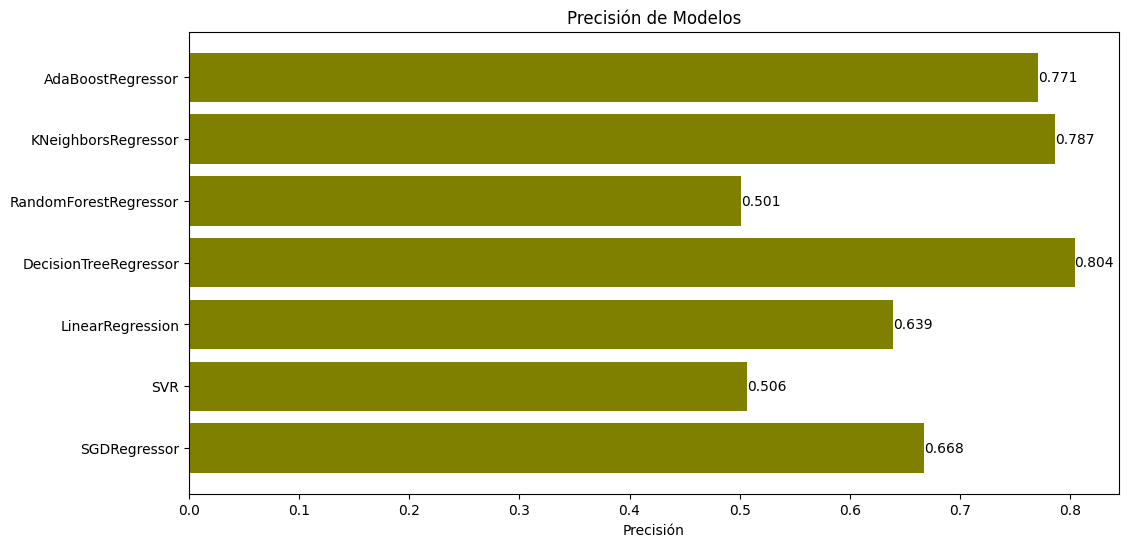

In [ ]:
#Grafica para ver los modelos y su presicion:
import matplotlib.pyplot as plt

# Extraemos nombres de modelos y porcentajes de precisión
model_names = [model.__class__.__name__ for model in models]
precisions = [mean_squared_error(y_test, model.predict(X_test.toarray())) for model in models]

# Creacion del gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(model_names, precisions, color='olive')
plt.xlabel('Precisión')
plt.title('Precisión de Modelos')
plt.gca().invert_yaxis()  # Invertir el eje y para que el modelo con la mayor precisión esté en la parte superior

# Agregar etiquetas en cada barra
for i, precision in enumerate(precisions):
    plt.text(precision, i, f"{precision:.3f}", ha='left', va='center')

plt.show()

<Axes: title={'center': 'score'}, xlabel='aired'>

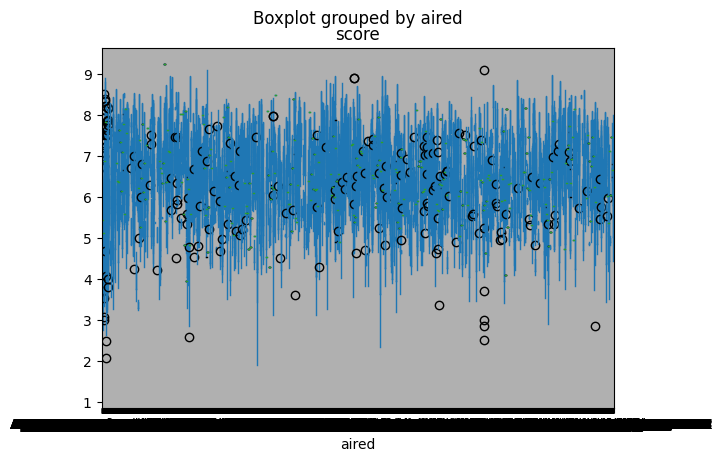

In [ ]:
dataset.boxplot("score", by="aired")

In [ ]:
#Guardando los modelos en archivos pickle
for model in models:
  with open(f'Model_{model.__class__.__name__}.pkl', 'wb') as file:
    pickle.dump(model, file)

##"Modelo en production"

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
import pickle
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer

In [ ]:
#Cargando los modelos pickle y usando unicamente el ganador para produccion
with open("/content/Model_RandomForestRegressor.pkl", "rb") as file:
  loaded_model = pickle.load(file)

with open("vectorizer.pkl", "rb") as file:
  loaded_vectorizer = pickle.load(file)

with open("most_common.tokens", "rb") as file:
  loaded_mct = pickle.load(file)

In [ ]:
stoplist = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()
lemmatizer = WordNetLemmatizer()

data = {'stopwords': stopwords, 'names': names}
with open('nltk_data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
#Cargando la funcion utilizada en el entrenamiento para volver a limpiar la data en produccion
def get_tokens_prediction(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stoplist: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    if token not in most_common_tokens: continue
    cleaned_tokens.append(token)

  return " ".join(cleaned_tokens)

In [ ]:
#Cargando el dataset completo
predict_df = pd.read_csv("/content/animes.csv")

In [ ]:
predict_df = predict_df[~predict_df["synopsis"].isna()]
predict_df = predict_df.reset_index()

In [ ]:
predict_df["Tokens String"] = predict_df["synopsis"].apply(lambda x: get_tokens_prediction(x))

In [ ]:
#cargar el vectorizado
X = loaded_vectorizer.transform(predict_df["Tokens String"])

In [ ]:
predictions = loaded_model.predict(X)

In [ ]:
#concatenacion de las columnas tokens string y prediction en el data set
result_df = pd.concat([predict_df, pd.Series(predictions, name="Prediction")], axis=1)
result_df = result_df.drop(['img_url', 'link'], axis=1)

In [ ]:
result_df

,index,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,Tokens String,Prediction
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,following high school team attempt effort tour...,8.75320
1,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,music path human but mother fall unable sound ...,8.50360
2,2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,the earth mysterious creature time long past c...,8.67250
3,3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,in order something something must lost young b...,8.93070
4,4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,after legendary vampire araragi become vampire...,8.72780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,middle living and yet decide goal soon met str...,7.73420
18332,19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,while student world mysterious book set ancien...,7.78130
18333,19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,year ago ghost certain student now want reveng...,7.71690
18334,19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,company finally and start go way going find yo...,7.51145
